In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, TwoLocal
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B, SPSA
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit.quantum_info import Pauli
import os

ModuleNotFoundError: No module named 'qiskit_machine_learning'

In [ ]:
bit_dim = 11
num_qubits = 10
split = 1
newpath = f'/Users/choyboy/Documents/Python/QML/hydrocarbon_dataset_angle_split/hydrocarbon_{bit_dim}q{num_qubits}/split{split}'
df_train_classes = pd.read_excel(f'{newpath}/qc_hc_train_classes_{bit_dim}q{num_qubits}.xlsx', header=None).to_numpy().flatten()
df_train_angle = pd.read_excel(f'{newpath}/qc_hc_train_input_{bit_dim}q{num_qubits}.xlsx', header=None).to_numpy()
df_test_classes = pd.read_excel(f'{newpath}/qc_hc_test_classes_{bit_dim}q{num_qubits}.xlsx', header=None).to_numpy().flatten()
df_test_angle = pd.read_excel(f'{newpath}/qc_hc_test_input_{bit_dim}q{num_qubits}.xlsx', header=None).to_numpy()
num_inputs = df_train_angle.shape[1]
num_train_points = df_train_classes.shape[0]
num_test_points = df_test_classes.shape[0]
for i in range(num_train_points):
    if df_train_classes[i] == 0:
        df_train_classes[i] = -1
for i in range(num_test_points):
    if df_test_classes[i] == 0:
        df_test_classes[i] = -1

In [2]:
# construct QNN with the QNNCircuit's default ZZFeatureMap feature map and RealAmplitudes ansatz.
feature_layers = 1
ansatz_layers = 1
maxiter = 1000
operator = Pauli("ZZZZZZZZZZ")
two_local_initial_layer = 'ry' #Initial layer for the 2-local ansatz
two_local_entangling_layer = 'cx' #Entangling layer for the 2-local ansatz
ansatz_entanglement = 'linear'

# feature_map = ZZFeatureMap(num_inputs, reps=feature_layers, entanglement='full')
feature_map = RealAmplitudes(num_qubits=num_qubits, entanglement="linear", parameter_prefix='x', reps=feature_layers, skip_final_rotation_layer=True)
ansatz = TwoLocal(num_qubits, two_local_initial_layer, two_local_entangling_layer, reps=ansatz_layers, entanglement=ansatz_entanglement, skip_final_rotation_layer=True)
qc = QNNCircuit(num_qubits=num_qubits, feature_map=feature_map, ansatz=ansatz)
estimator_qnn = EstimatorQNN(circuit=qc, observables=operator)

# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

# construct neural network classifier
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=COBYLA(maxiter=maxiter), callback=callback_graph
)

# newpath = f'/Users/choyboy/Documents/Python/QML/hc_class/angle_encoding/cobyla/ra_global'
# if not os.path.exists(newpath):
#     os.makedirs(newpath)

NameError: name 'Pauli' is not defined

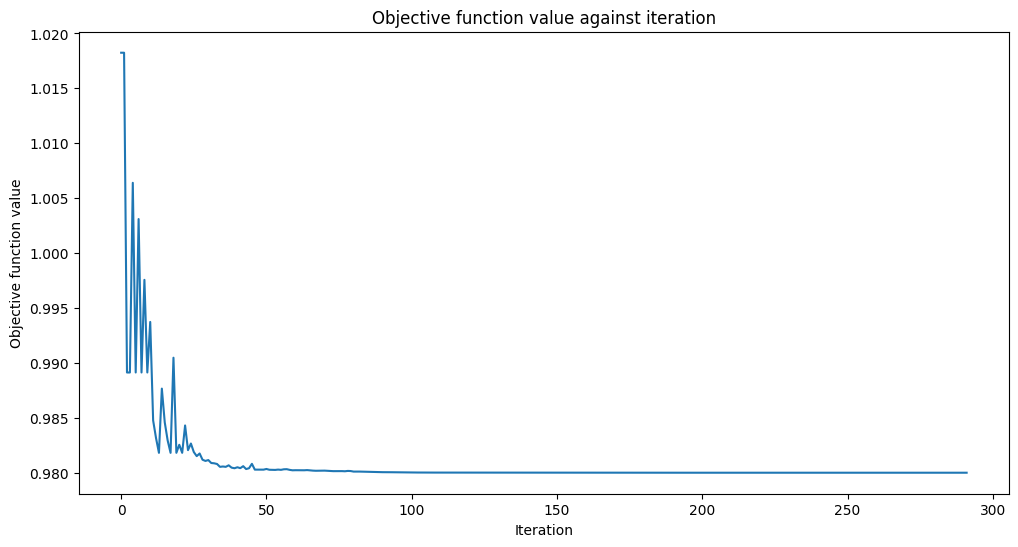

0.55
0.3


In [10]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
estimator_classifier.fit(df_train_angle, df_train_classes)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
print(estimator_classifier.score(df_train_angle, df_train_classes))
print(estimator_classifier.score(df_test_angle, df_test_classes))

# estimator_classifier.save(f'{newpath}/split{split}_a{ansatz_layers}_m{int(maxiter/1000)}k')
# save the classifier
# newpath = f'/Users/choyboy/Documents/Python/QML/hc_class/angle_encoding/cobyla/{two_local_initial_layer}_{two_local_entangling_layer}_{ansatz_entanglement}/split{split}/a{ansatz_layers}_m{int(maxiter/1000)}k'
# if not os.path.exists(newpath):
#     os.makedirs(newpath)

# estimator_classifier.save(f'{newpath}/qml')
# objective_vals = np.array(objective_vals)
# weight_vals = np.array(weight_vals)
# np.savetxt(f"{newpath}/objective_vals", objective_vals)
# np.savetxt(f"{newpath}/weight_vals", weight_vals)